In [33]:
import pandas as pd
from sklearn.model_selection import train_test_split
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('data/raw/train_1.csv', index_col=None)
df.columns = map(str.lower, df.columns)

In [3]:
df.columns

Index(['page', '2015-07-01', '2015-07-02', '2015-07-03', '2015-07-04',
       '2015-07-05', '2015-07-06', '2015-07-07', '2015-07-08', '2015-07-09',
       ...
       '2016-12-22', '2016-12-23', '2016-12-24', '2016-12-25', '2016-12-26',
       '2016-12-27', '2016-12-28', '2016-12-29', '2016-12-30', '2016-12-31'],
      dtype='object', length=551)

In [37]:
series = df.iloc[:, 1:]

In [5]:
series.columns

Index(['2015-07-01', '2015-07-02', '2015-07-03', '2015-07-04', '2015-07-05',
       '2015-07-06', '2015-07-07', '2015-07-08', '2015-07-09', '2015-07-10',
       ...
       '2016-12-22', '2016-12-23', '2016-12-24', '2016-12-25', '2016-12-26',
       '2016-12-27', '2016-12-28', '2016-12-29', '2016-12-30', '2016-12-31'],
      dtype='object', length=550)

# Split Training and Test Sets

In [7]:
X = series.iloc[:,:500]
y = series.iloc[:,500:]

In [9]:
print(X.shape)
print(y.shape)

(145063, 500)
(145063, 50)


In [40]:
X.iloc[1]

2015-07-01    11.0
2015-07-02    14.0
2015-07-03    15.0
2015-07-04    18.0
2015-07-05    11.0
              ... 
2016-11-07    14.0
2016-11-08    14.0
2016-11-09    54.0
2016-11-10     5.0
2016-11-11    10.0
Name: 1, Length: 500, dtype: float64

In [12]:
X_train, X_val, y_train, y_val = train_test_split(X.values, y.values, test_size=0.1, random_state=42)

In [19]:
# Convert to DataFrame/Series to apply interpolation
X_train = pd.DataFrame(X_train, columns=X.columns)
X_val = pd.DataFrame(X_val, columns=X.columns)
y_train = pd.DataFrame(y_train, columns=y.columns)
y_val = pd.DataFrame(y_val, columns=y.columns)

# Step 2: Apply linear interpolation to the training set
X_train = X_train.interpolate(method='linear', limit_direction='forward', axis=0)
y_train = y_train.interpolate(method='linear', limit_direction='forward', axis=0)

# Apply linear interpolation to the validation set
X_val = X_val.interpolate(method='linear', limit_direction='forward', axis=0)
y_val = y_val.interpolate(method='linear', limit_direction='forward', axis=0)

# Convert back to numpy arrays
X_train = X_train.values
X_val = X_val.values
y_train = y_train.values
y_val = y_val.values

In [20]:
row_index = 80000
train, test = X_train[row_index], y_train[row_index]

In [28]:
history = [x for x in train]
predictions = list()
for t in range(len(test)):
	model = ARIMA(history, order=(10,1,0))
	model_fit = model.fit()
	ypred = model_fit.forecast()[0]
	predictions.append(ypred)
	history.append(test[t])

Test MSE: 593507.930


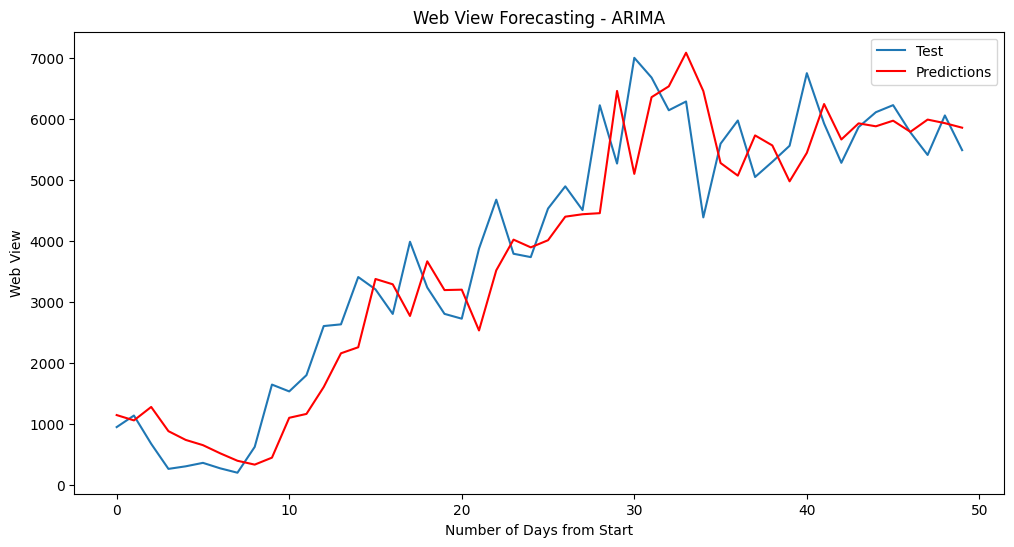

In [34]:
from sklearn.metrics import mean_squared_error
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)

# plot
plt.figure(figsize=(12, 6))
sns.lineplot(data=test, label='Test')
sns.lineplot(data=predictions, label='Predictions', color='red')
plt.title('Web View Forecasting - ARIMA')
plt.xlabel('Number of Days from Start')
plt.ylabel('Web View')
plt.legend()
plt.show()